## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import warnings
%matplotlib inline
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## Importing the Data

In [2]:
df = pd.read_csv('play_test.csv')

In [3]:
df

,u_id,cleared_stage,retry_count,score,stars,stage_id,date,time,obs_index
0,100000101,True,0.0,0.0,0.0,1,2015-03-12,04:17:04,10814
1,100000101,True,0.0,0.0,0.0,2,2015-03-12,13:53:47,10815
2,100000101,True,0.0,0.0,0.0,3,2015-03-12,13:58:09,10816
3,100000101,True,0.0,0.0,0.0,4,2015-03-12,14:39:40,10817
4,100000101,True,0.0,0.0,0.0,5,2015-03-12,14:44:02,10818
...,...,...,...,...,...,...,...,...,...
405125,103212776,True,0.0,0.0,0.0,3,2019-06-09,01:04:00,96708510
405126,103213122,True,0.0,0.0,0.0,1,2019-06-08,14:49:01,96712350
405127,103213122,True,0.0,0.0,0.0,2,2019-06-08,14:51:01,96712351
405128,103213122,True,0.0,0.0,0.0,3,2019-06-08,14:53:05,96712352


## Checking for Missing Data

In [4]:
df.isnull().sum()

u_id                 0
cleared_stage        0
retry_count      43009
score            43009
stars            43009
stage_id             0
date                 0
time                 0
obs_index            0
dtype: int64

As we can see, there are 43,009 rows with missing values concerning the retry_count, score, and stars columns. While there are multiple ways we can deal with missing data (e.g. imputing with mean value), we will decide to simply drop all rows that have NaN values. This will simplify the dataset and won't come at a great cost since we still have plenty of data to work with.

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

u_id             0
cleared_stage    0
retry_count      0
score            0
stars            0
stage_id         0
date             0
time             0
obs_index        0
dtype: int64

We can verify that indeed, we have no null values anymore.

## EDA

### Summary Statistics

In [7]:
df.describe()

,u_id,retry_count,score,stars,stage_id,obs_index
count,3.621210e+05,362121.000000,3.621210e+05,362121.000000,362121.000000,3.621210e+05
mean,1.015695e+08,0.031619,2.062362e+06,0.688897,87.329462,4.870494e+07
std,8.706389e+05,0.270048,2.589924e+07,0.934186,303.475852,2.795856e+07
min,1.000001e+08,0.000000,0.000000e+00,0.000000,1.000000,1.081400e+04
25%,1.008297e+08,0.000000,0.000000e+00,0.000000,8.000000,2.351664e+07
50%,1.016286e+08,0.000000,1.104050e+05,0.000000,22.000000,5.028673e+07
75%,1.022716e+08,0.000000,5.691000e+05,1.000000,60.000000,7.328008e+07
max,1.032131e+08,18.000000,2.147484e+09,3.000000,2192.000000,9.671235e+07


### Visualizing the Distribution of the Received Log Scores.

In [8]:
df['log_score'] = np.log(df['score'] + 1)

We will first log-transform the score column to reduce the skewness of the data. Since a lot of the scores are 0, log-transforming scores of zero will result in an error since the logarithm of zero is undefined. To avoid this, we will add 1 to each score and then take the logarithm of this value. This will ensure consistency and will help us avoid the error.

In [9]:
df

,u_id,cleared_stage,retry_count,score,stars,stage_id,date,time,obs_index,log_score
0,100000101,True,0.0,0.0,0.0,1,2015-03-12,04:17:04,10814,0.0
1,100000101,True,0.0,0.0,0.0,2,2015-03-12,13:53:47,10815,0.0
2,100000101,True,0.0,0.0,0.0,3,2015-03-12,13:58:09,10816,0.0
3,100000101,True,0.0,0.0,0.0,4,2015-03-12,14:39:40,10817,0.0
4,100000101,True,0.0,0.0,0.0,5,2015-03-12,14:44:02,10818,0.0
...,...,...,...,...,...,...,...,...,...,...
405124,103212776,True,0.0,0.0,0.0,2,2019-06-09,00:55:04,96708509,0.0
405125,103212776,True,0.0,0.0,0.0,3,2019-06-09,01:04:00,96708510,0.0
405126,103213122,True,0.0,0.0,0.0,1,2019-06-08,14:49:01,96712350,0.0
405127,103213122,True,0.0,0.0,0.0,2,2019-06-08,14:51:01,96712351,0.0


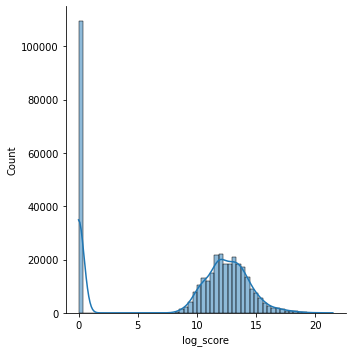

In [10]:
sns.displot(df, x="log_score", kde=True)

Looking at the distribution plot above, we notice that we have a very high count of zero (log) scores, indicating that a lot of players attempted to play the game but failed to achieve a non-zero score. Scores from 5 to 20 follow a bell-shaped curve, with the peak being somewhere between 10 and 15.

### Calculating Game Popularity & Average Player Performance 

Looking at the dataset, we could infer the level of popularity of game, and how the popularity varies across time. There are several way we could quantify this. One metric could be to calculate the number of unique players who played the game across a certain unit of time (e.g. day, year). We could also measure player performance by calculating the mean scores of all those (unique) players who played on a given day. For example, if three players played the game on a given day, with scores of 1,5, and 9, the mean score of would be 5 for that day.

In [11]:
"""
For the purpose of this analysis, we will drop all the rows with duplicate u_id
while keeping their highest score, so we only have unique players.

"""
new_df_1 = df.sort_values('score', ascending=False).drop_duplicates('u_id').sort_index()
new_df_1

,u_id,cleared_stage,retry_count,score,stars,stage_id,date,time,obs_index,log_score
0,100000101,True,0.0,0.0,0.0,1,2015-03-12,04:17:04,10814,0.000000
30,100001281,True,0.0,0.0,0.0,3,2015-03-12,08:02:04,126187,0.000000
129,100001288,True,0.0,0.0,0.0,1,2015-03-14,16:32:28,126450,0.000000
151,100001327,True,0.0,0.0,0.0,4,2015-03-13,08:45:22,129241,0.000000
173,100001686,True,0.0,0.0,0.0,1,2015-03-12,05:18:14,149708,0.000000
...,...,...,...,...,...,...,...,...,...,...
405116,103212247,True,0.0,154237.0,2.0,12,2019-06-08,16:28:02,96701964,11.946252
405119,103212318,True,0.0,0.0,0.0,2,2019-06-04,03:17:01,96703212,0.000000
405121,103212744,True,0.0,0.0,0.0,1,2019-06-06,13:47:03,96707675,0.000000
405123,103212776,True,0.0,0.0,0.0,1,2019-06-09,00:48:05,96708508,0.000000


In [12]:
new_df_2 = new_df_1.groupby('date').agg(unique_players=('u_id', 'nunique'), mean_score=('score', 'mean')).reset_index() #Checks how many players played each day and the average score of those players on that date
new_df_2 

,date,unique_players,mean_score
0,2015-03-12,171,0.0
1,2015-03-13,144,0.0
2,2015-03-14,195,0.0
3,2015-03-15,182,0.0
4,2015-03-16,140,0.0
...,...,...,...
1334,2019-06-07,1,67542869.0
1335,2019-06-08,2,77118.5
1336,2019-06-09,1,0.0
1337,2019-06-10,1,34718.0


<AxesSubplot:xlabel='date'>

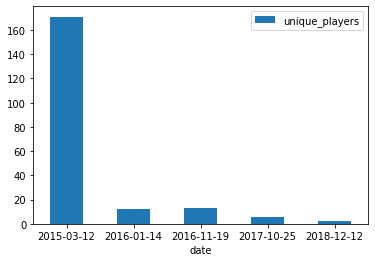

In [13]:
new_df_2.iloc[::300,:].plot.bar(x='date', y='unique_players', rot=0)


The bar plot represents the number of unique players on a given day every 10 months. As we can see, in March 2015, we have the highest number of unique players who played the game, with a count of >160. However, this number starts to go down as we progress further in time. This is not surprising since game popularity for most games usually starts to wane over time.

<AxesSubplot:xlabel='date'>

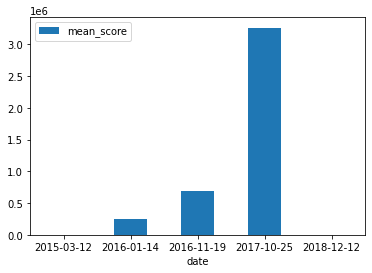

In [14]:
new_df_2.iloc[::300,:].plot.bar(x='date', y='mean_score', rot=0)

Looking at the mean score over time, we can infer some insights. Interestingly, the mean score, and thus the average player performance, increases consistently as we move across time (with the exception of December 2018 where the mean score was zero), while the game popularity (generally) decreases over time. This implies that in the beginning, we have a large influx of players who initially try out the game (casual gamers), but as time progresses and the game matures, only the highest performing players end up still playing the game (competitive gamers). Based on my own personal experience, I can support this hypothesis. For example, when the game of Fortnite started, the game popularity was huge, but the average quality of the players who played the game was pretty low, since most of the players who played the game were casual gamers. 



However, if one plays Fortnite now, one can noticeably see the difference in the average quality of players, as more competitive gamers are playing the game compared to casual gamers. Nevertheless, **further research and data will be needed to see if the difference in player quality across time is indeed statistically significant!** Moreover, the trends we are seeing are largely dependent on the time scale we are using. So we can verify if this general trend holds true using year as the unit of time.        

In [15]:
new_df_1['year'] = pd.DatetimeIndex(new_df_1['date']).year
new_df_3 = new_df_1.groupby('year').agg(unique_players=('u_id', 'nunique'), mean_score=('score', 'mean')).reset_index() #Checks how many unique players played each year and the average score of those players on that date

In [16]:
new_df_3

,year,unique_players,mean_score
0,2015,4937,1.917925e+05
1,2016,2436,1.512199e+06
2,2017,1603,5.896595e+06
3,2018,664,8.967820e+06
4,2019,274,2.069825e+07


<AxesSubplot:xlabel='year'>

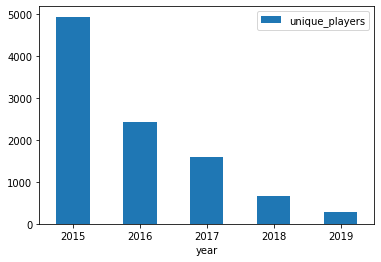

In [17]:
new_df_3.plot.bar(x='year', y='unique_players', rot=0)

<AxesSubplot:xlabel='year'>

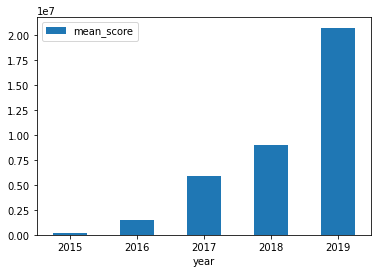

In [18]:
new_df_3.plot.bar(x='year', y='mean_score', rot=0)

Indeed, the inverse relationship between the number of unique players and the mean score holds true and is more consistent across the yearly level, with 2015 having the highest number of unique players who played the game and also the lowest mean score, and 2019 having the lowest number of players but the highest mean score.



*On a side note, this is basically the Law of Large numbers in action! When we visualized the trends on a daily level every 10 months, we noticed a general pattern - that game popularity generally increases over time and is inversely proportional to average player performance, which generally decreases over time. However, there were some minor fluctuations and inconsistencies. Namely 2016-11-19 had more players playing the game than 2016-01-14, and 2018-12-12 had a mean score of zero, much lower compared to 2017-10-25 which had a mean score of >3. This is an example of how when we have a small population (like the number of players in a given day), we generally see more outliers and inconsistent trends, whereas when we have a large population (number of players in a given year), we see trends that are more consistent and aligned with our expectations.*

### User-Level Analysis

#### Calculating Play Frequency Within a Day

Given the dataset, we can also identify the players who have played the game the most number of times within a given day. Specifically, we will first check how many times each player played the game on a given day and the select the player with the highest count.

In [19]:
new_df_4 = df.groupby(['date', 'u_id']).agg(count=('cleared_stage', 'count')) #checks how many times each player played the game on a given day 

In [20]:
new_df_4

count
date       u_id            
2015-03-12 100000101      8
           100001281      3
           100001288     25
           100001327      3
           100001686      3
...                     ...
2019-06-10 103171305      1
2019-06-11 102197628      2
           103208765      3
2019-06-12 103148651      3
           103211454      9

[52826 rows x 1 columns]

The dataframe above shows the number of times each user played the game within a day. For example, user **100000101** played the game 8 times on 2015-03-12, whereas user **100001288** played the game 25 times on the same day.

In [21]:
new_df_4[['count']].max()

count    137
dtype: int64

In [22]:
new_df_4[['count']].idxmax() #user 102925590 played the game 137 times on 2017-12-11!

count    (2017-12-11, 102925590)
dtype: object

As we can see, user **102925590** was the player who played the game the highest number of times on a given day. Specifically, this user played the game 137 times on 2017-12-11!

We can not only identify the players who played the game the most number of time on a given day, but we can also calculate the average number of times players play the game, which turns out to be approximately 7 times a day! 

In [23]:
new_df_4['count'].mean() #on average, players play the game almost 7 times a day!

6.8549767160110555

We can perform the same calculations but this time aggregate the data by year, so we can find the user who played the game the highest number of times in a year!

In [24]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [25]:
new_df_5 = df.groupby(['year', 'u_id']).agg(count=('cleared_stage', 'count'))

In [26]:
new_df_5[['count']].max()

count    1335
dtype: int64

In [27]:
new_df_5[['count']].idxmax() #however user 102650635 was the players who played the game the highest number of times in a given year at 1335 times on 2017

count    (2017, 102650635)
dtype: object

As we can see, user **102650635** was the player with the highest number of plays in a given year. Specifically, this user played the game 1335 throughout 2017!

#### Calculating Play Frequency Across Different Days

This time, instead of calculating the number of times users played the game within a day, we can calculate the number of days each user played the game at least once.

In [28]:
new_df_6 = df.groupby(['u_id', 'date']).count().groupby(level=0).size().reset_index(name='Number of different days the game was played')

In [29]:
new_df_6

,u_id,Number of different days the game was played
0,100000101,3
1,100001281,1
2,100001288,5
3,100001327,4
4,100001686,1
...,...,...
9909,103212247,3
9910,103212318,1
9911,103212744,1
9912,103212776,1


The dataframe above shows the number of days each user played the game at least one time. For example, user **100000101** played the game at least once across 3 different days, whereas user **100001288** played the game at least once on 5 different days.

In [30]:
new_df_6[['Number of different days the game was played']].max()

Number of different days the game was played    346
dtype: int64

In [31]:
new_df_6[['Number of different days the game was played']].idxmax()

Number of different days the game was played    3884
dtype: int64

In [32]:
new_df_6.iloc[3884,:]

u_id                                            101397994
Number of different days the game was played          346
Name: 3884, dtype: int64

As we can see, user **101397994** was the player who played the game atleast once the most number of times across different days. Specifically, this user played the game atleast once on 346 different days - almost everyday throughout a year!

## Examining the Distribution of Scores Conditional on the Stage of the Game & Stars Received

We will now examine the distribution of scores conditional on the stage of the game and stars received. First, let's plot the kernel density estimation of the log_score conditional on the stars, where we plot separate distributions of the log_score for each star level. 

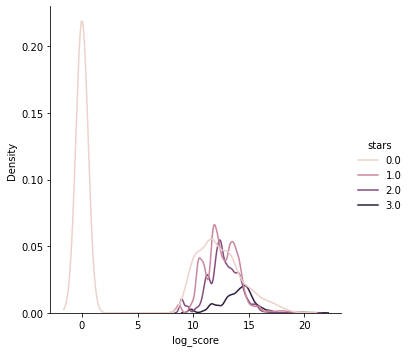

In [33]:
sns.displot(df, x="log_score", hue = "stars", kind='kde')

As we can see, the majority of the zero scores correspond to a star level of 0. This indicates that many players who played the game failed to achieve any stars and ended up with a score of zero. However, as we move further along, we can notice some patterns. Firstly, the (non-zero) scores corresponding to zero stars are more positively skewed compared to non-zero stars, indicating most players with zero stars had lower scores than players with non-zero stars. The scores corresponding to 2 stars are slightly less positively skewed compared to scores corresponding to one star, indicating that there are slightly more 2-star players with higher scores compared to 1-star players.The 3-star scores are noticeably negatively skewed, hinting that 3-star players generally score significantly higher than 2-star and 1-star (and of course zero star) players.

In order to further plot the distribution of the scores conditional on the number of stars and stage_id, we can first plot the distribution of the stage_id to see if there are any significant patterns we need to be aware about. This will also provide us with insights as to how the stages are structured. 

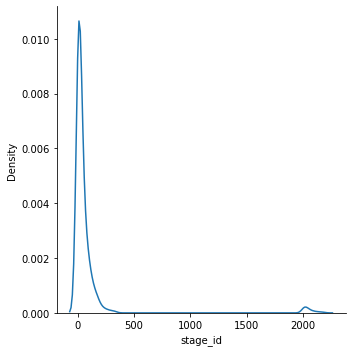

In [34]:
sns.displot(df, x="stage_id",kind='kde')

As we can see, we have two peaks when it comes to the distribution of the stage ids. Firstly, most of the plays correspond to stages below stage_id 500, with a few plays corresponding to stage_id 2000. This means we can divide our analysis into two separate sections, one corresponding to early stage data (stage_id < 500), and the other corresponding to late stage data (stage_id >=2000). 

In [35]:
early_stage_df = df[df['stage_id'] < 500]

In [36]:
late_stage_df = df[df['stage_id'] >= 2000]

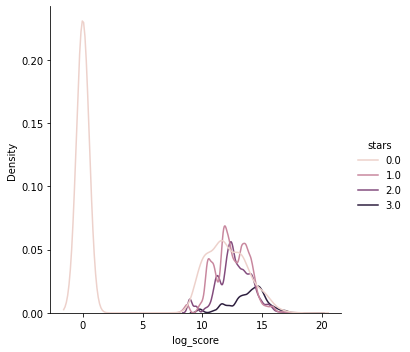

In [37]:
sns.displot(early_stage_df, x="log_score",hue='stars', kind='kde')

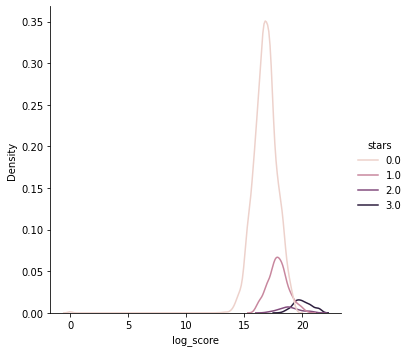

In [38]:
sns.displot(late_stage_df, x="log_score",hue='stars', kind='kde')

Looking at the two dataframes above, we can see a noticeable difference between
the distribution of the log score conditional on early stage level and late stage
level. Firstly, we notice that the early stage level distribution is very similar
to the overall distribution of log scores regardless of stage level,with a high density of zero scoring individuals who have zero stars. This is unsurprising since most of the data in the data set corresponds to early stage
levels (stage id <= 500). However, looking at the late stage distribution, we notice some significant changes. For example, we notice that no player regardless of the star level scored zero. We also notice that the distribution of
the log score conditional on star level and late stage level is more negatively skewed than the distribution of the log score conditional on star level and early stage level. This indicates that scores are generally higher as players
progress through later stages of the game. Nevertheless, this doesn’t mean that just because a player is in a late stage, they will achieve a star, as seen by a high density of zero-star scores at a late stage level.